# **Day 2 Part 1**

## 1. Apa yang dimaksud dengan overfitting dan underfitting? Bagaimana hubungannya dengan jumlah feature yang ada?
## 2. Strategi yang dapat dilakukan untuk menghindari underfitting?

## 3. Isilah a,b, dan c dalam titik-titik pada contoh kasus di bawah ini:
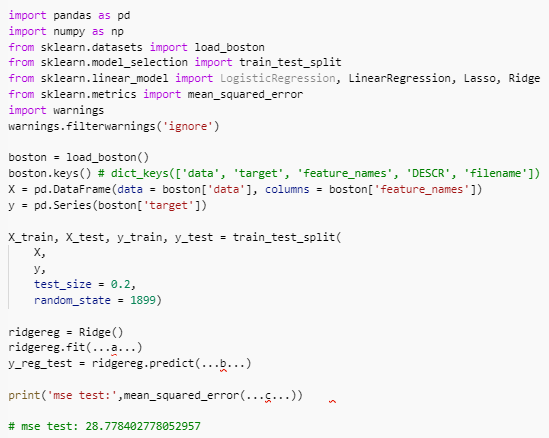

## 4. Hal apa saja yang menyebabkan overfitting? Sebutkan contohnya pada model-model yang kalian ketahui.

----------------------------------

# **Generalization, Overfitting, Underfitting**

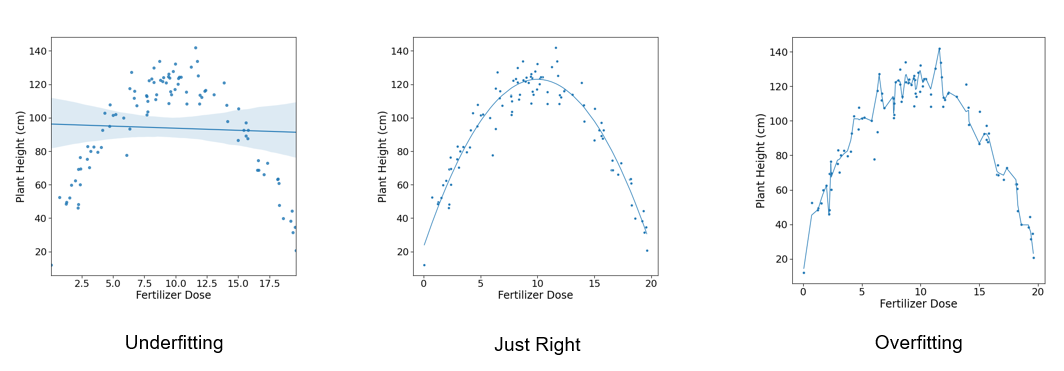

### **Diagram alir overfitting dan underfitting**

*Source: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning*

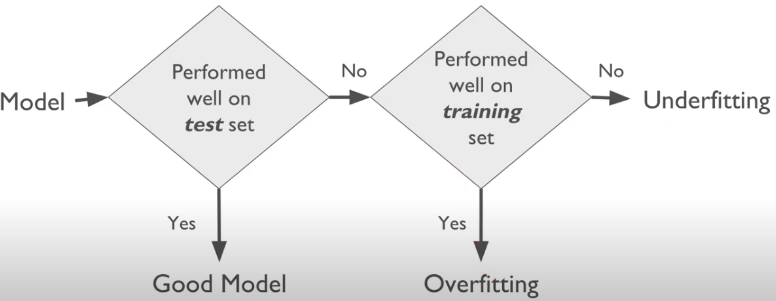

### **Underfitting:** 
- Model gagal dalam mempelajari hubungan antara inputs (X) dan output (y)
- Performa pada training dan validation/test set buruk (error tinggi).
- Memiliki bias yang tinggi dan variance yang rendah.

### **Overfitting:**
- Model mempelajari training data dengan sangat detail termasuk noise-nya juga.
- Performa pada training set jauh lebih baik (error rendah) daripada validation/test set.
- Memiliki variance yang tinggi dan bias yang rendah.

**Penyebab overfitting?**
- Melatih model linear regression dengan menggunakan independent variable yang terlalu banyak.
- Menggunakan degree/order yang terlalu tinggi pada polynomial features.
- Menggunakan nilai k yang tidak tepat pada model kNN.
- Menggunakan nilai max depth yang terlalu tinggi pada model decision tree.


--------------

## **Sweet spot**

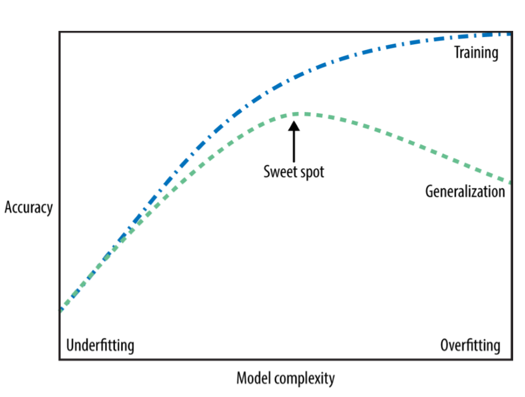 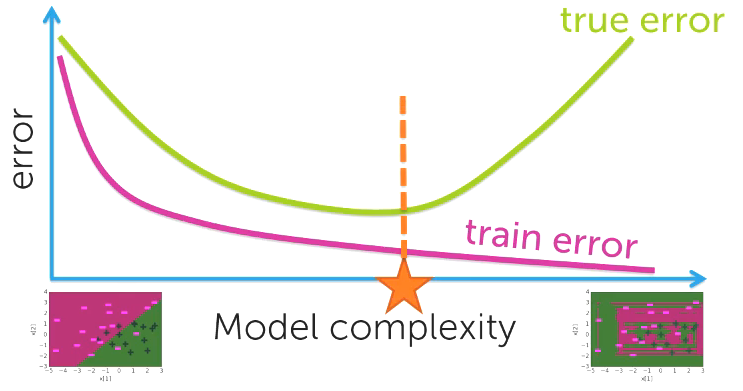



### Sweet spot adalah titik di mana error yang dihasilkan model pada training dan test set masih relatif rendah, biasanya ditemukan ketika error pada test set mulai meningkat, tapi pada saat yang bersamaan error pada training set masih relatif rendah.

### Ada trade-off antara overfitting dan underfitting. Idealnya, model yang baik adalah model yang dapat menemukan sweet spot antara underfitting dan overfitting.

### *Model yang baik adalah model yang memiliki training error sedikit lebih baik daripada test error.*

### **Cara untuk mengatasi underfitting:**
1. Menambah jumlah fitur.
2. Menambah kompleksitas model (jika diaplikasikan pada linear regresi, berarti mengubah jadi polynomial regresi model).
3. Jika data tidak berpola linear dapat beralih ke model non-linear.

### **Cara untuk mengatasi overfitting:**
1. Mengurangi jumlah fitur, sehingga kompleksitas model berkurang (termasuk mengurangi hyperparameter yang digunakan pada model).
2. Menambah jumlah training samples.
3. Menggunakan regularization.
4. Menggunakan cross-validation pada training set.

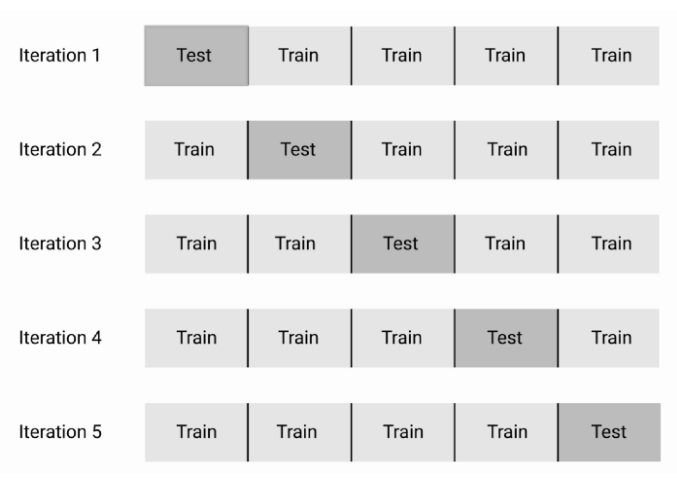
<!-- https://ibb.co/wQ67F20
https://ibb.co/VH5rCMs
https://ibb.co/BLZHpyB
https://ibb.co/r4Mbpx1 -->

   



## **Contoh penggunaan model linear regresi dengan polynomial features untuk mengaproksimasi non-linear functions**

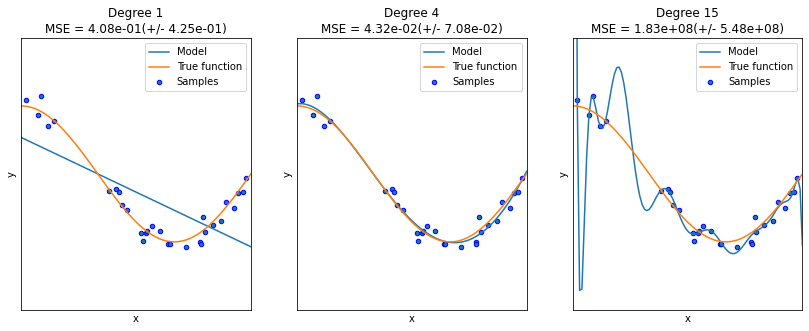

In [53]:
# Code source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring='neg_mean_squared_error', cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()));

**Dari 3 plot di atas, dapat disimpulkan bahwa:**

- Linear function dengan polynomial degree 1 tidak dapat merepresentasikan persebaran data training dengan baik (underfitting -> high bias dan low variance).
- Polynomial degree 4 hampir dapat mengaproksimasi true function dengan sempurna.
- Untuk polynomial dengan degree yang lebih tinggi, model menjadi overfit data training karena model jadi mempelajari data training dengan sangat detail beserta noise-nya (random fluctuations).

***Degree pada polynomial menggambarkan seberapa besar tingkat fleksibilitas model. Semakin tinggi degree-nya, berarti akan semakin banyak pula data poin yang dikenai oleh garis regresi.***

Secara kuantitatif, overfitting dan underfitting dapat dievaluasi dengan menggunakan cross-validation.
<br>
Kita dapat menghitung nilai RMSE pada validation atau test set. Semakin tinggi nilai RMSE-nya, berarti semakin kecil pula kemungkinan model dapat menggeneralisasi data training dengan baik.